# Naive Bayes

In [12]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        pass
    
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y):
        self.X_probas = [[0, 0] for _ in range(X.shape[1])]
        num_y0 = np.sum(y==0)
        num_y1 = np.sum(y==1)
        self.p_y = num_y1 / len(y)
        
        for instance in X[y==0]:
            for i in range(len(instance)):
                if instance[i] == 1:
                    self.X_probas[i][0] += 1

        for instance in X[y==1]:
            for i in range(len(instance)):
                if instance[i] == 1:
                    self.X_probas[i][1] += 1
        
        self.X_probas = np.array([[elem[0] / num_y0, elem[1] / num_y1] for elem in self.X_probas])
        self.m = self.X_probas.shape[0]
    
    def predict(self, instances):
        preds = []
        for instance in instances:
            prob0 = 1.0
            prob1 = 1.0
            for i in range(len(instance)):
                if instance[i] == 1:
                    prob0 *= self.X_probas[i][0]
                    prob1 *= self.X_probas[i][1]
                else:
                    prob0 *= (1-self.X_probas[i][0])
                    prob1 *= (1-self.X_probas[i][1])
            prob0 *= (1 - self.p_y)
            prob1 *= self.p_y
            preds.append(int(prob1 > prob0))
                
        return np.array(preds)

    def generate(self, n=1, y=None):
        def unconditional_sample():
            # draw from p(y)
            y_samples = np.random.binomial(1, self.p_y, n)

            # draw from p(x | y) 
            x_samples = [conditional_sample(y_samples[i], 1)[0] for i in range(n)]
            return np.array(x_samples), y_samples

        def conditional_sample(y, n):
            x_samples = []
            for i in range(n):
                x_i = np.random.binomial(1, self.X_probas[:, y], size=(self.m,))
                x_samples.append(x_i)
            return np.array(x_samples)

        return (conditional_sample(y, n), np.full((n,), y)) if y is not None else unconditional_sample()

## Naive Bayes Classifier

In [13]:
from helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(binary_features=True)

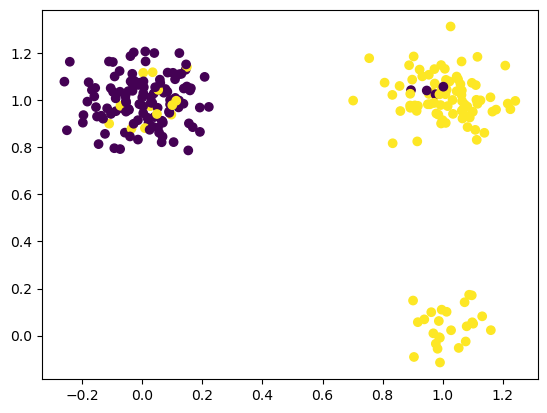

In [14]:
from helpers.Exploration import scatter_jitter
scatter_jitter(X_train[:,0], X_train[:,1], c=y_train)

In [15]:
model = NaiveBayes()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [16]:
from helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.9166666666666666,
 'precision': 0.9333333333333333,
 'recall': 0.9032258064516129}

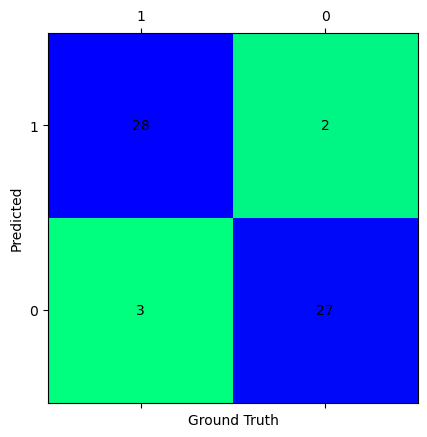

In [17]:
from helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)

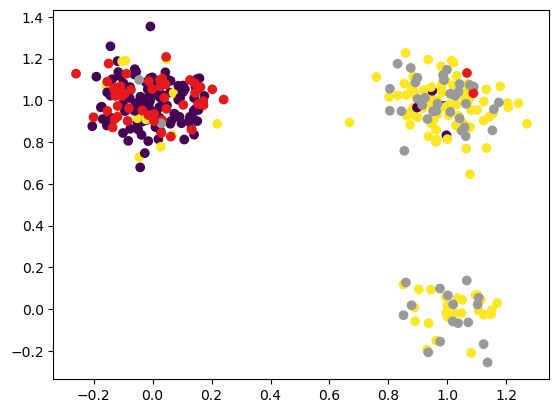

In [21]:
from helpers.Exploration import scatter_jitter
scatter_jitter(X_train[:,0], X_train[:,1], c=y_train)

X_gen, y_gen = model.generate(n=100)
scatter_jitter(X_gen[:,0], X_gen[:,1], c=y_gen, cmap="Set1")